# CNN Architectures Comparison
This notebook implements and compares various CNN architectures (LeNet-5, AlexNet, GoogLeNet, VGGNet, ResNet, Xception, SENet) on MNIST, FMNIST, and CIFAR-10 datasets.

In [ ]:
# Install necessary libraries (if not already installed)
!pip install tensorflow numpy matplotlib scikit-learn

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

## Step 1: Load and Preprocess Datasets

In [2]:
def load_datasets():
    def preprocess_data(data):
        (x_train, y_train), (x_test, y_test) = data
        x_train, x_test = x_train / 255.0, x_test / 255.0
        x_train, x_test = x_train.astype("float32"), x_test.astype("float32")
        return x_train, y_train, x_test, y_test

    mnist = preprocess_data(datasets.mnist.load_data())
    fmnist = preprocess_data(datasets.fashion_mnist.load_data())
    cifar10 = preprocess_data(datasets.cifar10.load_data())

    mnist = tuple(map(lambda x: np.expand_dims(x, axis=-1) if len(x.shape) == 3 else x, mnist))
    fmnist = tuple(map(lambda x: np.expand_dims(x, axis=-1) if len(x.shape) == 3 else x, fmnist))

    return {"MNIST": mnist, "FMNIST": fmnist, "CIFAR-10": cifar10}

datasets = load_datasets()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [10]:
print(datasets["MNIST"][0].shape)
mnist_data = datasets["MNIST"]
fmnist_data = datasets["FMNIST"]
cifar10_data = datasets["CIFAR-10"]
m_x_train, m_y_train, _, _ = mnist_data
f_x_train, f_y_train, _, _ = fmnist_data
c_x_train, c_y_train, _, _ = cifar10_data



(60000, 28, 28, 1)


In [11]:


# Visualize some MNIST images
def plot_data_samples(images, labels, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].squeeze(), cmap="gray")
        plt.title(f"Label: {labels[i]}")
        plt.axis("off")
    plt.show()

# Plot first 10 images


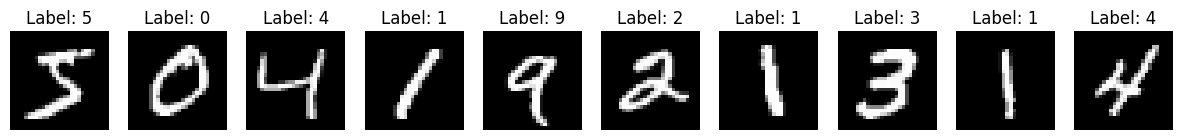

In [12]:
plot_data_samples(m_x_train, m_y_train)

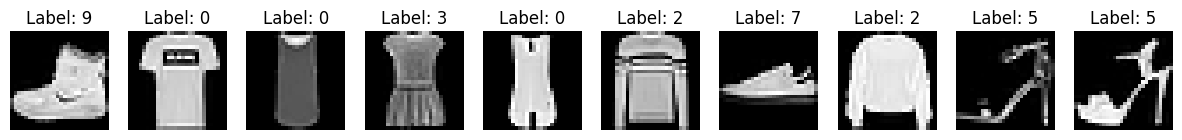

In [13]:
plot_data_samples(f_x_train, f_y_train)

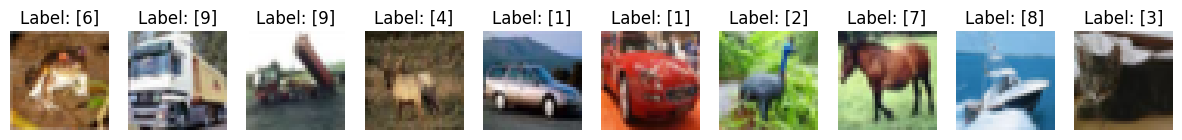

In [14]:
plot_data_samples(c_x_train, c_y_train)

## Step 2: Define CNN Architectures

In [ ]:
def build_lenet5(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(6, kernel_size=5, activation='tanh', input_shape=input_shape),
        layers.AvgPool2D(pool_size=(2, 2)), # Added pool_size=(2, 2)
        layers.Conv2D(16, kernel_size=5, activation='tanh'),
        layers.AvgPool2D(pool_size=(2, 2)), # Added pool_size=(2, 2)
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model



# Add the remaining architectures (GoogLeNet, VGGNet, ResNet, Xception, SENet) here

In [4]:
def build_alexnet(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(96, kernel_size=11, strides=1, activation='relu', input_shape=input_shape), # Changed strides to 1
        layers.MaxPool2D(pool_size=3, strides=2),
        layers.Conv2D(256, kernel_size=5, padding="same", activation='relu'),
        layers.MaxPool2D(pool_size=3, strides=2),
        layers.Conv2D(384, kernel_size=3, padding="same", activation='relu'),
        layers.Conv2D(384, kernel_size=3, padding="same", activation='relu'),
        layers.Conv2D(256, kernel_size=3, padding="same", activation='relu'),
        layers.MaxPool2D(pool_size=3, strides=2),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [3]:
def build_googlenet(input_shape, num_classes):
    def inception_module(x, filters):
        f1, f3_in, f3_out, f5_in, f5_out, pool_proj = filters
        conv1 = layers.Conv2D(f1, (1, 1), padding='same', activation='relu')(x)
        conv3 = layers.Conv2D(f3_in, (1, 1), padding='same', activation='relu')(x)
        conv3 = layers.Conv2D(f3_out, (3, 3), padding='same', activation='relu')(conv3)
        conv5 = layers.Conv2D(f5_in, (1, 1), padding='same', activation='relu')(x)
        conv5 = layers.Conv2D(f5_out, (5, 5), padding='same', activation='relu')(conv5)
        pool = layers.MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
        pool = layers.Conv2D(pool_proj, (1, 1), padding='same', activation='relu')(pool)
        return layers.Concatenate()([conv1, conv3, conv5, pool])

    input_layer = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (7, 7), strides=2, padding='same', activation='relu')(input_layer)
    x = layers.MaxPool2D((3, 3), strides=2, padding='same')(x)
    x = inception_module(x, [64, 96, 128, 16, 32, 32])
    x = layers.GlobalAvgPool2D()(x)
    output_layer = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs=input_layer, outputs=output_layer)

def build_vggnet(input_shape, num_classes):
    model = models.Sequential()
    for _ in range(2):  # Two blocks
        model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
        model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
        model.add(layers.MaxPool2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model


In [1]:
def build_resnet(input_shape, num_classes):
    def residual_block(x, filters):
        shortcut = x
        x = layers.Conv2D(filters, (3, 3), padding='same', activation='relu')(x)
        x = layers.Conv2D(filters, (3, 3), padding='same')(x)
        return layers.Add()([shortcut, x])

    input_layer = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
    x = residual_block(x, 64)
    x = layers.GlobalAvgPool2D()(x)
    output_layer = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs=input_layer, outputs=output_layer)

In [11]:
def build_senet(input_shape, num_classes):
    def squeeze_excite_block(input_tensor, ratio=16):
        filters = input_tensor.shape[-1]
        se = layers.GlobalAvgPool2D()(input_tensor)
        se = layers.Dense(filters // ratio, activation='relu')(se)
        se = layers.Dense(filters, activation='sigmoid')(se)
        return layers.Multiply()([input_tensor, se])

    input_layer = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(input_layer)
    x = squeeze_excite_block(x)
    x = layers.GlobalAvgPool2D()(x)
    output_layer = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs=input_layer, outputs=output_layer)

In [14]:
def build_xception(input_shape, num_classes):
    input_layer = layers.Input(shape=input_shape)
    x = layers.SeparableConv2D(64, (3, 3), padding='same', activation='relu')(input_layer)
    x = layers.SeparableConv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.GlobalAvgPool2D()(x)
    output_layer = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inputs=input_layer, outputs=output_layer)

## Step 3: Training and Evaluation Functions

In [2]:
def train_model(model, dataset, model_name, dataset_name):
    (x_train, y_train, x_test, y_test) = dataset
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=2)
    y_pred = model.predict(x_test).argmax(axis=1)
    report = classification_report(y_test, y_pred, output_dict=True)
    return history, report

def plot_results(histories, reports, model_name):
    for dataset_name, history in histories.items():
        plt.plot(history.history['loss'], label=f'{dataset_name} Loss')
    plt.title(f'{model_name} Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [3]:
def plot_accuracy(histories, reports, model_name):
    for dataset_name, history in histories.items():
        plt.plot(history.history['accuracy'], label=f'{dataset_name} Accuracy')
    plt.title(f'{model_name} Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

## Step 4: Train and Compare All Architectures

In [4]:
def train_compare(architectures):
    for model_name, model_fn in architectures.items():
        histories, reports = {}, {}
        for dataset_name, dataset in datasets.items():
            print(f"Training {model_name} on {dataset_name}...")
            input_shape = dataset[0].shape[1:]
            model = model_fn(input_shape, num_classes=10)
            history, report = train_model(model, dataset, model_name, dataset_name)
            histories[dataset_name] = history
            reports[dataset_name] = report

        plot_results(histories, reports, model_name)
        plot_accuracy(histories, reports, model_name)

Comparing performance of googlenet


Training LeNet-5 on MNIST...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 - 28s - 17ms/step - accuracy: 0.9207 - loss: 0.2624 - val_accuracy: 0.9715 - val_loss: 0.0999
Epoch 2/5
1688/1688 - 39s - 23ms/step - accuracy: 0.9711 - loss: 0.0956 - val_accuracy: 0.9773 - val_loss: 0.0767
Epoch 3/5
1688/1688 - 25s - 15ms/step - accuracy: 0.9798 - loss: 0.0642 - val_accuracy: 0.9833 - val_loss: 0.0616
Epoch 4/5
1688/1688 - 25s - 15ms/step - accuracy: 0.9843 - loss: 0.0485 - val_accuracy: 0.9832 - val_loss: 0.0590
Epoch 5/5
1688/1688 - 25s - 15ms/step - accuracy: 0.9881 - loss: 0.0393 - val_accuracy: 0.9840 - val_loss: 0.0544
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Training LeNet-5 on FMNIST...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 - 28s - 17ms/step - accuracy: 0.7927 - loss: 0.5657 - val_accuracy: 0.8320 - val_loss: 0.4558
Epoch 2/5
1688/1688 - 41s - 24ms/step - accuracy: 0.8514 - loss: 0.4049 - val_accuracy: 0.8577 - val_loss: 0.3883
Epoch 3/5
1688/1688 - 26s - 15ms/step - accuracy: 0.8681 - loss: 0.3570 - val_accuracy: 0.8697 - val_loss: 0.3568
Epoch 4/5
1688/1688 - 26s - 15ms/step - accuracy: 0.8791 - loss: 0.3301 - val_accuracy: 0.8713 - val_loss: 0.3522
Epoch 5/5
1688/1688 - 41s - 24ms/step - accuracy: 0.8867 - loss: 0.3074 - val_accuracy: 0.8783 - val_loss: 0.3390
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Training LeNet-5 on CIFAR-10...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1407/1407 - 34s - 24ms/step - accuracy: 0.3611 - loss: 1.7909 - val_accuracy: 0.4160 - val_loss: 1.6483
Epoch 2/5
1407/1407 - 42s - 30ms/step - accuracy: 0.4472 - loss: 1.5542 - val_accuracy: 0.4788 - val_loss: 1.4801
Epoch 3/5
1407/1407 - 41s - 29ms/step - accuracy: 0.4929 - loss: 1.4258 - val_accuracy: 0.5022 - val_loss: 1.4046
Epoch 4/5
1407/1407 - 35s - 25ms/step - accuracy: 0.5222 - loss: 1.3446 - val_accuracy: 0.5170 - val_loss: 1.3874
Epoch 5/5
1407/1407 - 41s - 29ms/step - accuracy: 0.5464 - loss: 1.2852 - val_accuracy: 0.5230 - val_loss: 1.3625
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


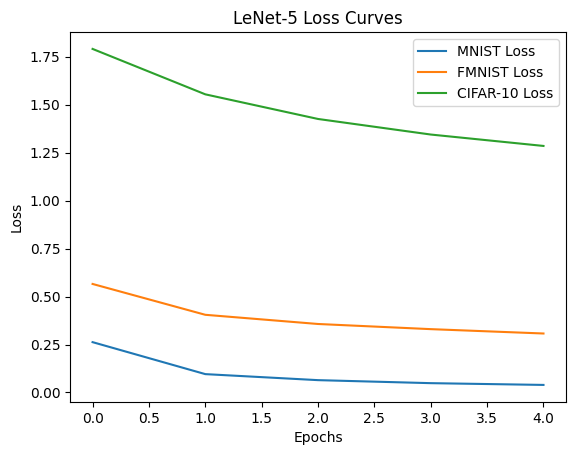

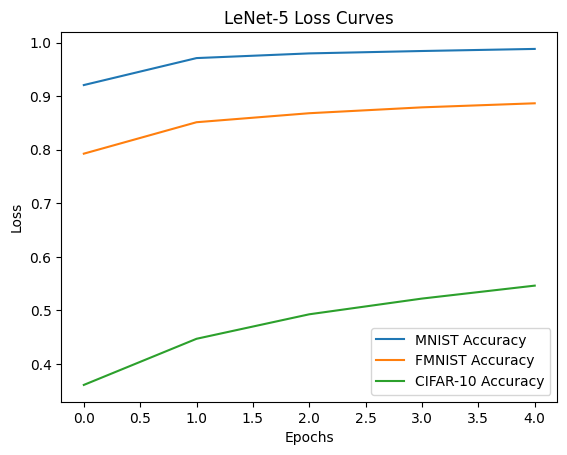

In [ ]:
architectures = {
    "LeNet-5": build_lenet5
}
train_compare(architectures)

AlexNet

Training AlexNet on MNIST...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 - 1338s - 793ms/step - accuracy: 0.1114 - loss: 2.3023 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 2/5
1688/1688 - 1340s - 794ms/step - accuracy: 0.1129 - loss: 2.3014 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 3/5
1688/1688 - 1330s - 788ms/step - accuracy: 0.1132 - loss: 2.3014 - val_accuracy: 0.1050 - val_loss: 2.3024
Epoch 4/5
1688/1688 - 1347s - 798ms/step - accuracy: 0.1132 - loss: 2.3014 - val_accuracy: 0.1050 - val_loss: 2.3021
Epoch 5/5
1688/1688 - 1321s - 783ms/step - accuracy: 0.1132 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3021
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 119ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/keras/src

Training AlexNet on FMNIST...
Epoch 1/5
1688/1688 - 1325s - 785ms/step - accuracy: 0.7334 - loss: 0.7125 - val_accuracy: 0.8357 - val_loss: 0.4595
Epoch 2/5
1688/1688 - 1344s - 796ms/step - accuracy: 0.8429 - loss: 0.4455 - val_accuracy: 0.8430 - val_loss: 0.4373
Epoch 3/5
1688/1688 - 1341s - 795ms/step - accuracy: 0.8629 - loss: 0.3854 - val_accuracy: 0.8722 - val_loss: 0.3390
Epoch 4/5
1688/1688 - 1327s - 786ms/step - accuracy: 0.8710 - loss: 0.3575 - val_accuracy: 0.8763 - val_loss: 0.3731
Epoch 5/5
1688/1688 - 1337s - 792ms/step - accuracy: 0.8797 - loss: 0.3361 - val_accuracy: 0.8600 - val_loss: 0.3799
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step
Training AlexNet on CIFAR-10...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1407/1407 - 1495s - 1s/step - accuracy: 0.0986 - loss: 2.3033 - val_accuracy: 0.0976 - val_loss: 2.3033
Epoch 2/5
1407/1407 - 1485s - 1s/step - accuracy: 0.0994 - loss: 2.3029 - val_accuracy: 0.0976 - val_loss: 2.3028
Epoch 3/5
1407/1407 - 1452s - 1s/step - accuracy: 0.1004 - loss: 2.3028 - val_accuracy: 0.0976 - val_loss: 2.3031
Epoch 4/5
1407/1407 - 1456s - 1s/step - accuracy: 0.0985 - loss: 2.3028 - val_accuracy: 0.1038 - val_loss: 2.3028
Epoch 5/5
1407/1407 - 1451s - 1s/step - accuracy: 0.0974 - loss: 2.3028 - val_accuracy: 0.0970 - val_loss: 2.3028
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 181ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


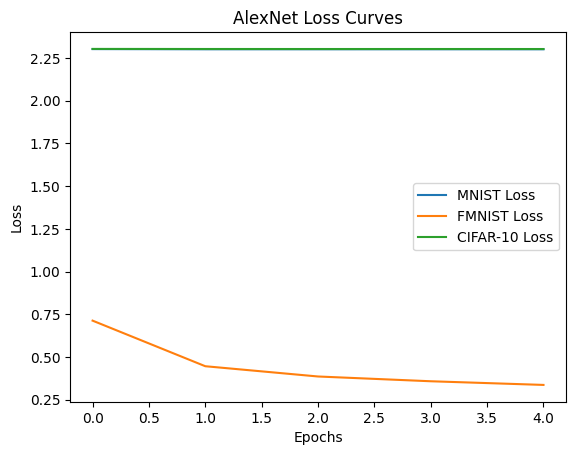

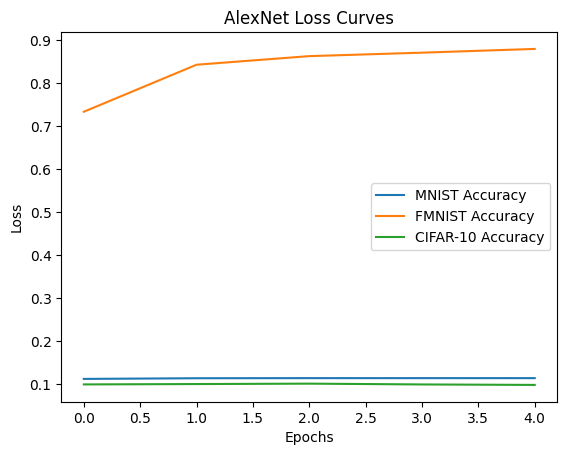

In [8]:
architectures = {
    "AlexNet": build_alexnet
}
train_compare(architectures)


GoogleNet

Training AlexNet on MNIST...
Epoch 1/5
1688/1688 - 98s - 58ms/step - accuracy: 0.8634 - loss: 0.4367 - val_accuracy: 0.9573 - val_loss: 0.1439
Epoch 2/5
1688/1688 - 139s - 82ms/step - accuracy: 0.9600 - loss: 0.1332 - val_accuracy: 0.9780 - val_loss: 0.0757
Epoch 3/5
1688/1688 - 94s - 55ms/step - accuracy: 0.9703 - loss: 0.0956 - val_accuracy: 0.9712 - val_loss: 0.0904
Epoch 4/5
1688/1688 - 144s - 85ms/step - accuracy: 0.9765 - loss: 0.0752 - val_accuracy: 0.9827 - val_loss: 0.0606
Epoch 5/5
1688/1688 - 140s - 83ms/step - accuracy: 0.9811 - loss: 0.0601 - val_accuracy: 0.9860 - val_loss: 0.0495
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Training AlexNet on FMNIST...
Epoch 1/5
1688/1688 - 96s - 57ms/step - accuracy: 0.7255 - loss: 0.7448 - val_accuracy: 0.8017 - val_loss: 0.5324
Epoch 2/5
1688/1688 - 96s - 57ms/step - accuracy: 0.8182 - loss: 0.4996 - val_accuracy: 0.8307 - val_loss: 0.4631
Epoch 3/5
1688/1688 - 94s - 56ms/step - accuracy: 0.8466 - loss: 0.4227 - val_accuracy: 0.8555 - v

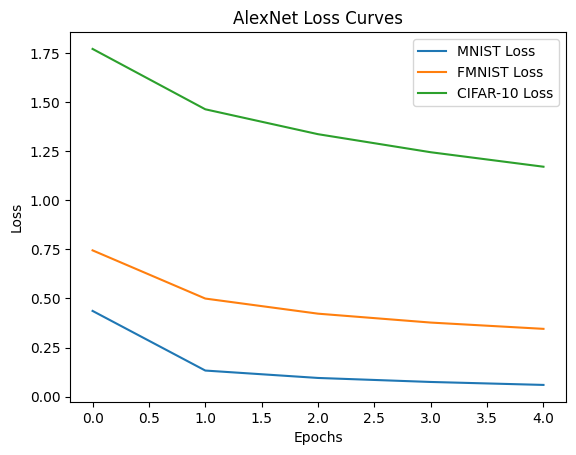

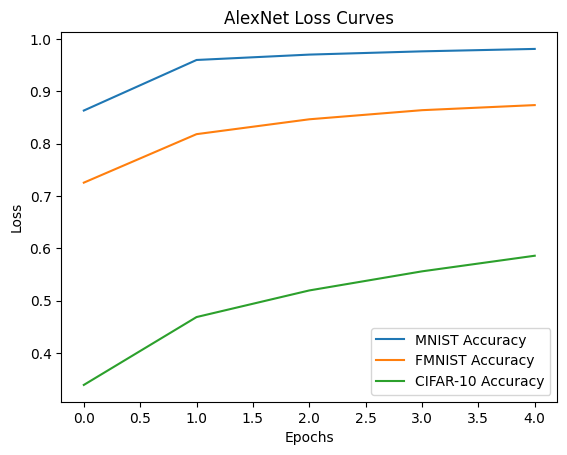

In [10]:
architectures = {
    "AlexNet": build_googlenet
}
train_compare(architectures)

VGGNet


Training VGGNet on MNIST...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 - 901s - 534ms/step - accuracy: 0.9691 - loss: 0.0984 - val_accuracy: 0.9873 - val_loss: 0.0457
Epoch 2/5
1688/1688 - 934s - 553ms/step - accuracy: 0.9881 - loss: 0.0390 - val_accuracy: 0.9890 - val_loss: 0.0323
Epoch 3/5
1688/1688 - 905s - 536ms/step - accuracy: 0.9917 - loss: 0.0260 - val_accuracy: 0.9918 - val_loss: 0.0300
Epoch 4/5
1688/1688 - 915s - 542ms/step - accuracy: 0.9937 - loss: 0.0208 - val_accuracy: 0.9907 - val_loss: 0.0373
Epoch 5/5
1688/1688 - 923s - 547ms/step - accuracy: 0.9946 - loss: 0.0180 - val_accuracy: 0.9898 - val_loss: 0.0349
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step
Training VGGNet on FMNIST...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 - 908s - 538ms/step - accuracy: 0.8704 - loss: 0.3512 - val_accuracy: 0.9077 - val_loss: 0.2615
Epoch 2/5
1688/1688 - 923s - 547ms/step - accuracy: 0.9165 - loss: 0.2239 - val_accuracy: 0.9102 - val_loss: 0.2435
Epoch 3/5
1688/1688 - 908s - 538ms/step - accuracy: 0.9334 - loss: 0.1773 - val_accuracy: 0.9213 - val_loss: 0.2214
Epoch 4/5
1688/1688 - 886s - 525ms/step - accuracy: 0.9468 - loss: 0.1418 - val_accuracy: 0.9235 - val_loss: 0.2197
Epoch 5/5
1688/1688 - 933s - 553ms/step - accuracy: 0.9591 - loss: 0.1102 - val_accuracy: 0.9208 - val_loss: 0.2387
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step
Training VGGNet on CIFAR-10...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1407/1407 - 990s - 703ms/step - accuracy: 0.5094 - loss: 1.3584 - val_accuracy: 0.6408 - val_loss: 1.0192
Epoch 2/5
1407/1407 - 1037s - 737ms/step - accuracy: 0.6969 - loss: 0.8641 - val_accuracy: 0.7192 - val_loss: 0.8175
Epoch 3/5
1407/1407 - 1035s - 736ms/step - accuracy: 0.7928 - loss: 0.5894 - val_accuracy: 0.7380 - val_loss: 0.7920
Epoch 4/5
1407/1407 - 984s - 699ms/step - accuracy: 0.8870 - loss: 0.3229 - val_accuracy: 0.7462 - val_loss: 0.8800
Epoch 5/5
1407/1407 - 1040s - 739ms/step - accuracy: 0.9467 - loss: 0.1588 - val_accuracy: 0.7500 - val_loss: 1.0740
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 129ms/step


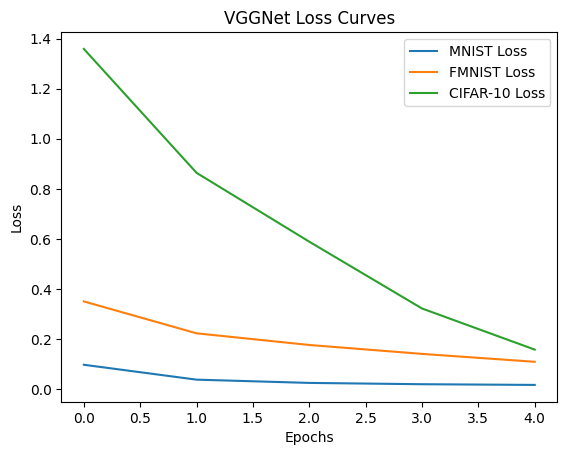

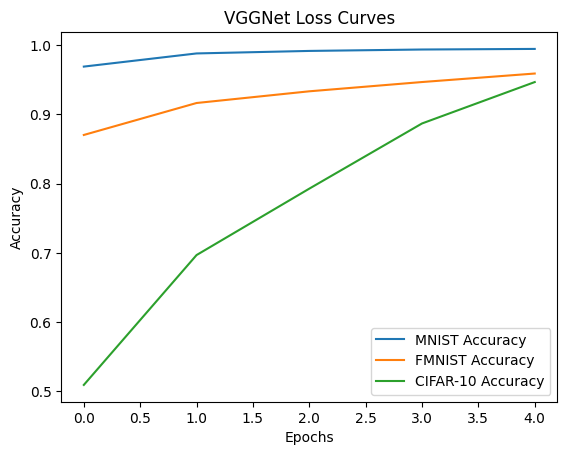

In [8]:
architectures = {
    "VGGNet": build_vggnet
}
train_compare(architectures)

Training SeNet on MNIST...
Epoch 1/5
1688/1688 - 43s - 26ms/step - accuracy: 0.2469 - loss: 2.0164 - val_accuracy: 0.3453 - val_loss: 1.7565
Epoch 2/5
1688/1688 - 85s - 50ms/step - accuracy: 0.3531 - loss: 1.6933 - val_accuracy: 0.3663 - val_loss: 1.6288
Epoch 3/5
1688/1688 - 79s - 47ms/step - accuracy: 0.3712 - loss: 1.6370 - val_accuracy: 0.3848 - val_loss: 1.5832
Epoch 4/5
1688/1688 - 83s - 49ms/step - accuracy: 0.3859 - loss: 1.6031 - val_accuracy: 0.4013 - val_loss: 1.5516
Epoch 5/5
1688/1688 - 80s - 47ms/step - accuracy: 0.3995 - loss: 1.5735 - val_accuracy: 0.4120 - val_loss: 1.5319
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Training SeNet on FMNIST...
Epoch 1/5
1688/1688 - 43s - 26ms/step - accuracy: 0.2932 - loss: 1.9313 - val_accuracy: 0.4108 - val_loss: 1.7500
Epoch 2/5
1688/1688 - 81s - 48ms/step - accuracy: 0.4686 - loss: 1.5911 - val_accuracy: 0.5220 - val_loss: 1.4471
Epoch 3/5
1688/1688 - 82s - 48ms/step - accuracy: 0.5491 - loss: 1.3355 - val_accuracy: 0.5828 - val_loss:

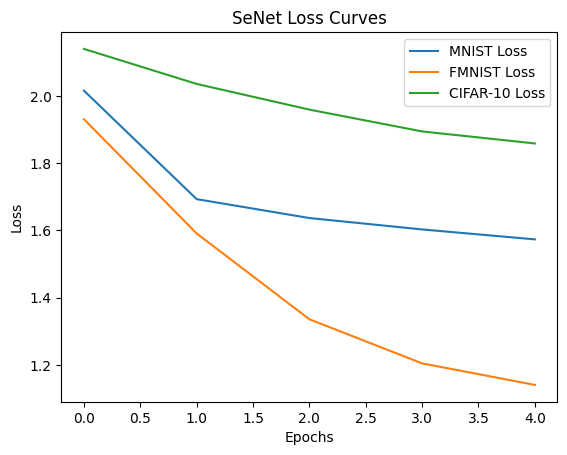

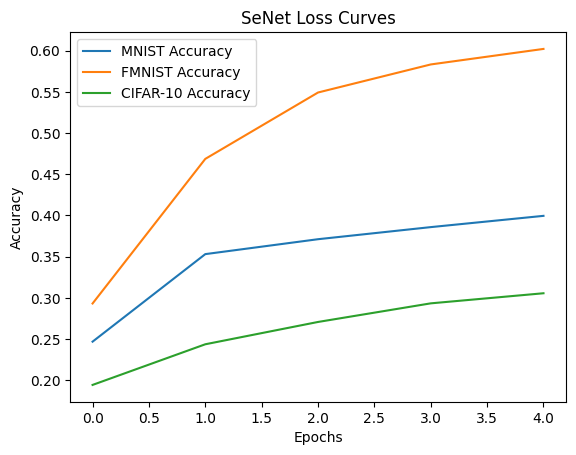

In [12]:
architectures = {
    "SeNet": build_senet
}
train_compare(architectures)

Training Xception on MNIST...
Epoch 1/5
1688/1688 - 136s - 81ms/step - accuracy: 0.2992 - loss: 1.8060 - val_accuracy: 0.4082 - val_loss: 1.5871
Epoch 2/5
1688/1688 - 141s - 83ms/step - accuracy: 0.4020 - loss: 1.5917 - val_accuracy: 0.4358 - val_loss: 1.5033
Epoch 3/5
1688/1688 - 149s - 88ms/step - accuracy: 0.4616 - loss: 1.4774 - val_accuracy: 0.5117 - val_loss: 1.3795
Epoch 4/5
1688/1688 - 137s - 81ms/step - accuracy: 0.5109 - loss: 1.3558 - val_accuracy: 0.5517 - val_loss: 1.2507
Epoch 5/5
1688/1688 - 146s - 87ms/step - accuracy: 0.5461 - loss: 1.2645 - val_accuracy: 0.5762 - val_loss: 1.1754
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
Training Xception on FMNIST...
Epoch 1/5
1688/1688 - 136s - 81ms/step - accuracy: 0.3523 - loss: 1.6706 - val_accuracy: 0.5210 - val_loss: 1.3126
Epoch 2/5
1688/1688 - 133s - 79ms/step - accuracy: 0.5300 - loss: 1.2591 - val_accuracy: 0.5410 - val_loss: 1.2242
Epoch 3/5
1688/1688 - 132s - 78ms/step - accuracy: 0.5831 - loss: 1.1399 - val_accuracy: 0.

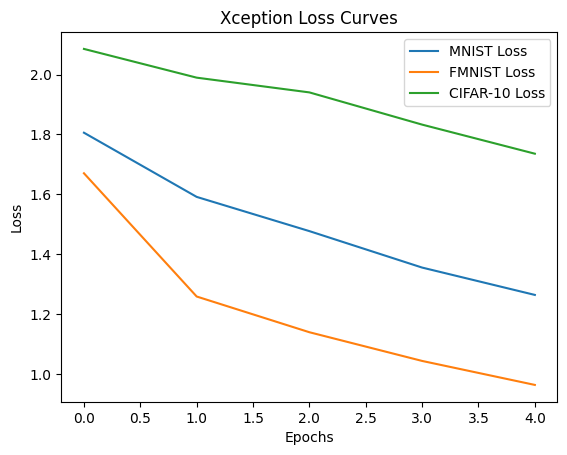

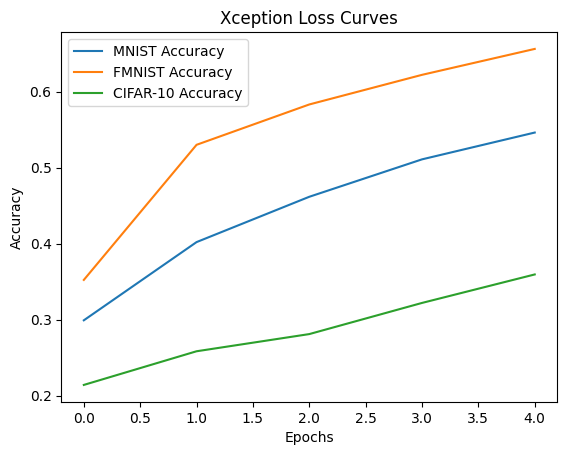

In [15]:
architectures = {
    "Xception": build_xception
}
train_compare(architectures)

ResNet

Training ResNet on MNIST...
Epoch 1/5
1688/1688 - 461s - 273ms/step - accuracy: 0.5829 - loss: 1.1746 - val_accuracy: 0.8103 - val_loss: 0.5979
Epoch 2/5
1688/1688 - 499s - 296ms/step - accuracy: 0.8286 - loss: 0.5303 - val_accuracy: 0.8770 - val_loss: 0.4061
Epoch 3/5
1688/1688 - 502s - 297ms/step - accuracy: 0.8637 - loss: 0.4299 - val_accuracy: 0.8612 - val_loss: 0.3888
Epoch 4/5
1688/1688 - 503s - 298ms/step - accuracy: 0.8879 - loss: 0.3588 - val_accuracy: 0.9128 - val_loss: 0.2743
Epoch 5/5
1688/1688 - 500s - 296ms/step - accuracy: 0.9061 - loss: 0.2964 - val_accuracy: 0.9203 - val_loss: 0.2491
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step
Training ResNet on FMNIST...
Epoch 1/5
1688/1688 - 456s - 270ms/step - accuracy: 0.6213 - loss: 1.0331 - val_accuracy: 0.7247 - val_loss: 0.7811
Epoch 2/5
1688/1688 - 510s - 302ms/step - accuracy: 0.7572 - loss: 0.6978 - val_accuracy: 0.7680 - val_loss: 0.6526
Epoch 3/5
1688/1688 - 494s - 293ms/step - accuracy: 0.7853 - loss: 0.6091 - val_accuracy

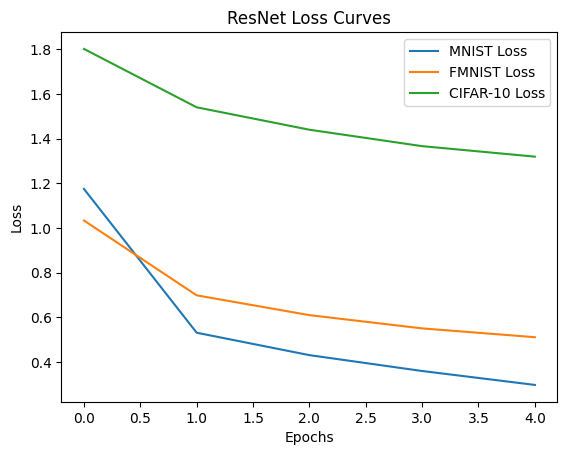

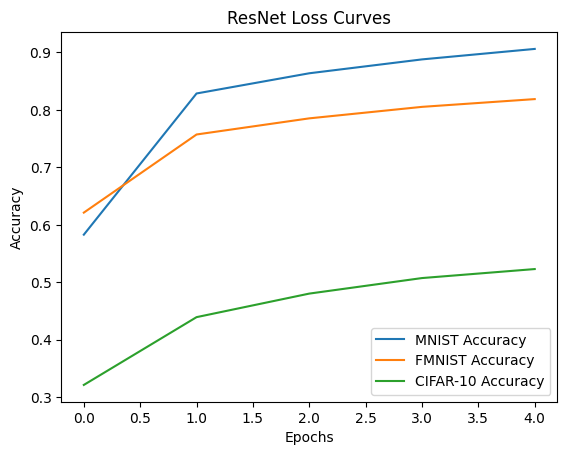

In [8]:
architectures = {
    "ResNet": build_resnet
}
train_compare(architectures)